# Momento de Retroalimentación: Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.

Oskar Arturo Gamboa Reyes | A01173648

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
# Cargar base de datos
colnames=['Celsius', 'Valks']
df = pd.read_csv('Valhalla23.csv', names=colnames, skiprows=1)

In [17]:


x = df[['Celsius']]
y = df['Valks']

# Define una semilla que corresponda con los últimos cuatro dígitos de tu matrícula
seed = 3648

# Carga el set de datos de Valhalla y divide el set de datos en entrenamiento (40%),
# validación (40%), y prueba (20%), utilizando el método train_test_split. y la semilla definida arriba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed)

x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.5, random_state=seed)

#Entrena un modelo base de tipo SGDRegressor que utilice una tasa de aprendizaje de 1E-4,
# un máximo de iteraciones de un millón, y que utilice la semilla definida arriba

model = linear_model.SGDRegressor(penalty=None, max_iter=1000000 ,eta0=1e-4, random_state = seed)
model.fit(x_train, y_train)
# Nuevas estimaciones

prediction_train = model.predict(x_train)
prediction_test = model.predict(x_test)
prediction_val = model.predict(x_val)

# Calcula el error cuadrático medio para este modelo,
#sobre los datos de entrenamiento, validación, y prueba.
errorTB = metrics.mean_squared_error(y_train, prediction_train)
print("Mean squared error train")
print(errorTB)

errorTEB = metrics.mean_squared_error(y_test, prediction_test)
print("Mean squared error test")
print(errorTEB)

errorVB = metrics.mean_squared_error(y_val, prediction_val)
print("Mean squared error val")
print(errorVB)




Mean squared error train
966.6038322068925
Mean squared error test
1057.753122690692
Mean squared error val
1338.009977840806


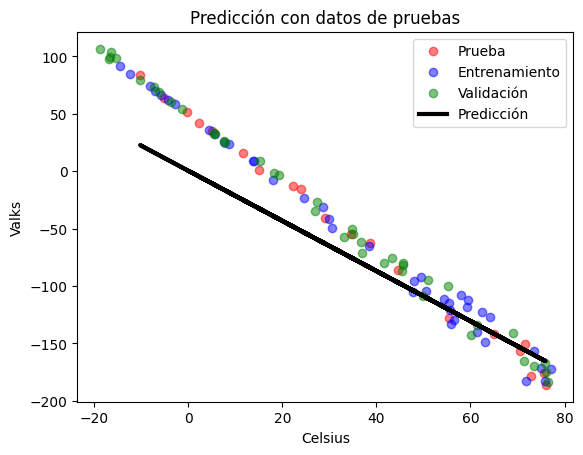

In [11]:
# Realiza una gráfica donde muestres cada subconjunto de datos (entrenamiento, validación, prueba)
# y el modelo de regresión obtenido (como una recta)

plt.plot(x_test, y_test ,'ro', label="Prueba", alpha=0.5)
plt.plot(x_train, y_train ,'bo', label="Entrenamiento", alpha=0.5)
plt.plot(x_val, y_val ,'go', label="Validación", alpha=0.5)
plt.plot(x_test, prediction_test, label="Predicción" , color="black", linewidth=3)
plt.title("Predicción con datos de pruebas")
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.legend()
plt.show()


In [12]:
# Crea una lista que contenga 20 elementos (enteros)
# entre 2 y 39 (sin repetición, y que incluyan el número 2).

numRand = [2,3,4,5,6,9,10,16,17,19,20,21,24,26,27,29,31,33,37,39]
msqError = 0
msqErrorVal = 0
msqErrorList = []
msqErrorValList = []


# Para cada uno de los tamaños del punto anterior, entrena 100 modelos usando un
# subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras.
for num in numRand:

  #print(x_train_subset.shape)
  for i in range(100):
    x_train_subset, _, y_train_subset, _ = train_test_split(x_train, y_train, test_size=(1-(num/40)))
    model = linear_model.SGDRegressor(penalty=None, max_iter=1000000 ,eta0=1e-4)
    model.fit(x_train_subset, y_train_subset)
    # Para cada uno de los modelos del punto anterior, calcula el error cuadrático medio en el subconjunto de entrenamiento
    #(el que tiene un número cambiante de muestras), y en el subconjunto de validación
    msqError += metrics.mean_squared_error(y_train_subset, model.predict(x_train_subset))
    msqErrorVal += metrics.mean_squared_error(y_val, model.predict(x_val))

  # Calcula el promedio de las 100 repeticiones para cada uno de los modelos y sus errores.
  # Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base
  msqError /= 100
  msqErrorList.append(msqError)
  msqErrorVal /= 100
  msqErrorValList.append(msqErrorVal)

  #print(msqError)
  #print(msqErrorVal)

msqErrorList.append(errorTB)
msqErrorValList.append(errorVB)
numRand.append(40)
print(msqErrorList)
print(msqErrorValList)


[168.28149523768886, 160.5881820322866, 151.9353813691344, 143.35398333547718, 163.6016498875207, 327.6555562763565, 432.59827461427136, 637.1530715694499, 619.5681090925239, 736.861994072165, 770.5413438423326, 752.956470665712, 844.7723692125979, 823.7738569804063, 883.1653212503392, 864.6410895044173, 865.9442252099437, 860.2142183529586, 918.2378459451998, 948.7532297936356, 966.6038322068925]
[5170.773018195009, 696.804549986667, 481.5691485639734, 353.2197226357818, 358.3680841107234, 575.3728015924556, 747.3466513699112, 964.4710611581726, 948.355813219066, 1090.5330510028728, 1109.4813080242557, 1091.8771940377242, 1224.81169728298, 1160.3272779759272, 1231.9935477525014, 1227.6602179764095, 1205.7054367438855, 1206.4223390121797, 1271.8463426831902, 1308.5126066588582, 1338.009977840806]


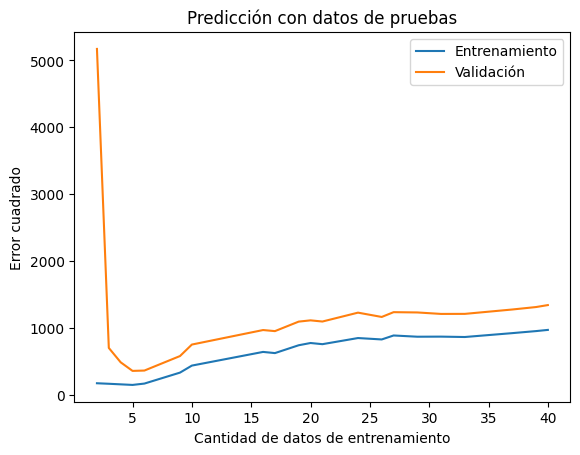

In [13]:
# Haz una gráfica donde se muestre la evolución del error promedio de entrenamiento y validación,
# para cada uno de los diferentes tamaños de entrenamiento

plt.plot(numRand, msqErrorList , label="Entrenamiento")
plt.plot(numRand, msqErrorValList , label="Validación")
plt.title("Predicción con datos de pruebas")
plt.xlabel('Cantidad de datos de entrenamiento')
plt.ylabel('Error cuadrado')
plt.legend()
plt.show()

# Con base en la grafica anterior, explica el tipo de ajuste obtenido para el primer modelo (el entrenado sobre 2 muestras) y para el modelo final (el entrenado sobre 40 muestras).

Podemos ver que para el modelo entrenado con dos muestras obtenemos muy poco error en el entrenamiento, esto tiene sentido ya que solo hay dos datos y es muy facil que se ajuste, sin embargo cuando calculamos el error con los datos de validación nos encontramos con un gran error ya que son muy pocos datos para entrenar un modelo. Con el modelo entrenado con 40 datos vemos que las gráficas tienen una menor varianza, entre la validación y el entrenamiento, pero podemos ver que talvez tenga un problema de overfitting, ya que el error en general aumento con tantos datos de prueba.

# También explica como cambia el tipo de ajuste a medida que se incrementa el número de muestras del entrenamiento.

Antes de usar 5 datos de muestra, el modelo es insignificante, ya que no realiza ninguna predicción solamente se ajusta a los datos entrenados, despues de 5 podemos ver una convergencia entre nuestras dos graficas, esto indica que ya esta generando un modelo viable, pero podemos ver que desde ese punto el error aumenta porque comienza a haber un problema de overfitting.

# Incluye también en tu análisis el grado de sesgo y de varianza para los diferentes modelos.

Como mencione anteriormente existe una gran varianza cuando usamos menos de 5 datos de prueba, el modelo es bueno cuando usa los mismos datos de entrenamiento, sin embargo es muy malo con nuevos datos, un problema de underfitting. Para los demás datos la varianza es practicamente la misma. Podemos ver un sesgo en la parte izquierda de la gráfica lo que indica que hay una menor cantidad de error con menos datos de prueba.

# Con base en la gráfica y los datos, identifica la cantidad de muestras más adecuada para realizar el entrenamiento. Justifica tu selección.

Podemos ver que la gráfica nos indica que usar **5** datos de prueba es lo más eficiente, ya que no tiene tanta varianza con los datos de validación y el error es el minimo.

In [18]:
# Entrena un nuevo modelo utilizando esa cantidad de muestras, y calcula su error cuadrático medio sobre el subconjunto de entrenamiento
# (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed)

x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size= (1-(5/40)), random_state=seed)


model = linear_model.SGDRegressor(penalty=None, max_iter=1000000 ,eta0=1e-4, random_state = seed)
model.fit(x_train, y_train)

prediction_train = model.predict(x_train)
prediction_test = model.predict(x_test)
prediction_val = model.predict(x_val)

errorT = metrics.mean_squared_error(y_train, prediction_train)
print("Mean squared error train")
print(errorT)

errorTE = metrics.mean_squared_error(y_test, prediction_test)
print("Mean squared error test")
print(errorTE)

errorV = metrics.mean_squared_error(y_val, prediction_val)
print("Mean squared error val")
print(errorV)

#Compara los valores del punto anterior contra los errores obtenidos para la línea base

print("Diferencia de errores de entrenamiento (40-5)")
print(errorTB-errorT)
print("Diferencia de errores de prueba (40-5)")
print(errorTEB-errorTE)
print("Diferencia de errores de validación (40-5)")
print(errorVB-errorV)

Mean squared error train
111.20900083731881
Mean squared error test
132.80876044991072
Mean squared error val
132.69963407694684
Diferencia de errores de entrenamiento (40-5)
855.3948313695737
Diferencia de errores de prueba (40-5)
924.9443622407812
Diferencia de errores de validación (40-5)
1205.3103437638592


# Argumenta cuál configuración funcionó mejor, y por qué

Funcionó mejor con 5 datos de entrenamiento ya que esta es la configuración óptima para no tener ni overfitting ni underfitting, proporciona el menor error posible con una varianza adecuada para predecir con datos nuevos.

In [21]:
!jupyter nbconvert --to html "/content/drive/MyDrive/ColabNotebooks/VallhalaScikitModelos.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/VallhalaScikitModelos.ipynb to html
[NbConvertApp] Writing 707192 bytes to /content/drive/MyDrive/ColabNotebooks/VallhalaScikitModelos.html
